# Models for Regression

You must

0. Perform an exploratory analysis of the data and pre-process the predictors to remove potential skewness in their distribution. Based on the transformed predictors, comment on the presence of relationships between pairs of predictors (estimate the correlation matrix). Also, are the relationships between the predictors and outcome individually linear (estimate all predictor-outcome correlations)?

Then, you must

1. Use the transformed predictors in the training set to learn an ordinary linear square (OLS) regression model and test the model using the test set (remember to apply the same pre-processing you used on the training set). Code/implement the OLS model from scratch and compare the results obtained with the build-in functions available in the programming language of your choice. Compare the model performance obtained on the test set with the estimates you would obtain using a resampling scheme as 5- or 10-fold cross validation: use both the RMSE and $R^2$ (again, code/implement the cross-validation from scratch and compare the results with those obtained with the build-in function).

2. Use the transformed predictors in the training set to learn a L2 (ou L1)-penalised linear regression model and test the model using the test set (remember to apply the same pre-processing you used on the training set). Code/implement the penalized model from scratch and compare the results obtained with the build-in functions available in the programming language of your choice. Determine the optimal value of $\lambda$ using a 5- or 10-fold cross-validation based on the RMSE (you can only use the training set in this phase, and your search space $\lambda$ should consist of at least 10 values). Report on process (show the cross-validation profile, both on terms of the RMSE and $R^2$). Report the accuracy (RMSE and $R^2$) obtained on the test set (again, code/implement the cross-validation from scratch and compare the results with those obtained with the build-in function).

3. Use the transformed predictors in the training set to learn either a PLS or a PCR regression model and test the model using the test set (remember to apply the same pre-processing you used on the training set). Determine the optimal number of components using a 5- or 10-fold cross-validation based on the RMSE (you can only use the training set in this phase). Report on process (show the cross-validation profile, both in terms of the RMSE and $R_2$). Report the accuracy (RMSE and $R_2$) obtained on the test set.

4. Use the transformed predictors in the training set to build a neural network model for regression and test the model using the test set (remember to apply the same pre-processing you used on the training set). Report the accuracy (RMSE and $R_2$) obtained on the test set. Do the nonlinear model outperform the linear model you previously developed? If so, what might this tell you about the underlying relationship between the predictors and the response?

## Importing packages

In [1]:
import sys

sys.path.append("../../")

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from os.path import join
import numpy as np

In [3]:
from ica.dataset import preprocess_regression_dataset

2024-12-30 19:25:16.393 | INFO     | ica.config:<module>:11 - PROJ_ROOT path is: /mnt/c/Users/franc/Code/UFC/MSc/S01/ica


In [4]:
pd.options.display.max_columns = None

sns.set_theme(style='darkgrid')
sns.set_palette("twilight_shifted")

## Reading Database

In [5]:
data = pd.read_csv("../../data/external/Agregado-20241114133303.csv", 
                   encoding="latin-1",
                   sep=";")

print(data.shape)
data.head()

(659, 229)


,Código do Município,Município,Estado,Ano de Referência,Código do Prestador,Prestador,Sigla do Prestador,Abrangência,Tipo de Serviço,Natureza Jurídica,G05A - Quantidade total de municípios atendidos com abastecimento de água,G05B - Quantidade total de municípios atendidos com esgotamento sanitário,G06A - População urbana residente do(s) município(s) com abastecimento de água,G06B - População urbana residente do(s) município(s) com esgotamento sanitário,"G12A - População total residente do(s) município(s) com abastecimento de água, segundo o IBGE","G12B - População total residente do(s) município(s) com esgotamento sanitário, segundo o IBGE",GE001 - Quantidade de municípios atendidos com abastecimento de água com delegação em vigor,GE002 - Quantidade de municípios atendidos com abastecimento de água com delegação vencida,GE003 - Quantidade de municípios atendidos com abastecimento de água sem delegação,GE005 - Quantidade total de municípios atendidos,GE008 - Quantidade de Sedes municipais atendidas com abastecimento de água,GE009 - Quantidade de Sedes municipais atendidas com esgotamento sanitário,GE010 - Quantidade de Localidades (excluídas as sedes) atendidas com abastecimento de água,GE011 - Quantidade de Localidades (excluídas as sedes) atendidas com esgotamento sanitário,GE014 - Quantidade de municípios atendidos com esgotamento sanitário com delegação em vigor,GE015 - Quantidade de municípios atendidos com esgotamento sanitário com delegação vencida,GE016 - Quantidade de municípios atendidos com esgotamento sanitário sem delegação,GE017 - Ano de vencimento da delegação de abastecimento de água,GE018 - Ano de vencimento da delegação de esgotamento sanitário,"GE025 - Quantidade de municípios não atendidos com abastecimento de água, mas com delegação em vigor","GE026 - Quantidade de municípios não atendidos com abastecimento de água, mas com delegação vencida para prestar esses serviços","GE028 - Quantidade de municípios não atendidos com esgotamento sanitário, mas com delegação em vigor para prestar esses serviços","GE029 - Quantidade de municípios não atendidos com esgotamento sanitário, mas com delegação vencida para prestar esses serviços",AG001 - População total atendida com abastecimento de água,AG001A - População total atendida com abastecimento de água no ano anterior ao de referência.,AG002 - Quantidade de ligações ativas de água,AG002A - Quantidade de ligações ativas de água no ano anterior ao de referência.,AG003 - Quantidade de economias ativas de água,AG003A - Quantidade de economias ativas de água no ano anterior ao de referência.,AG004 - Quantidade de ligações ativas de água micromedidas,AG004A - Quantidade de ligações ativas de água micromedidas no ano anterior ao de referência.,AG005 - Extensão da rede de água,AG005A - Extensão da rede de água no ano anterior ao de referência.,AG006 - Volume de água produzido,AG007 - Volume de água tratada em ETAs,AG008 - Volume de água micromedido,AG010 - Volume de água consumido,AG011 - Volume de água faturado,AG012 - Volume de água macromedido,AG013 - Quantidade de economias residenciais ativas de água,AG013A - Quantidade de economias residenciais ativas de água no ano anterior ao de referência.,AG014 - Quantidade de economias ativas de água micromedidas,AG014A - Quantidade de economias ativas de água micromedidas no ano anterior ao de referência.,AG015 - Volume de água tratada por simples desinfecção,AG016 - Volume de água bruta importado,AG017 - Volume de água bruta exportado,AG018 - Volume de água tratada importado,AG019 - Volume de água tratada exportado,AG020 - Volume micromedido nas economias residenciais ativas de água,AG021 - Quantidade de ligações totais de água,AG021A - Quantidade de ligações totais de água no ano anterior ao de referência.,AG022 - Quantidade de economias residenciais ativas de água micromedidas,AG022A - Quantidade de economias residenciais ativas de água micromedidas no ano anterior ao de referência.,AG024 - Volume de serviço,AG025A - População

In [6]:
df = preprocess_regression_dataset(data)
df.head()

,nm_municipio,ano,abrangencia,tipo_servico,nat_juridica,IN001,IN009,IN020,IN022,IN023,IN037,IN038,IN055,IN057
0,Acopiara,2022,Microrregional,Água,Organização social,1.0,100.00,37.69,47.89,NaN,54.21,18.39,20.76,0.0
1,Aiuaba,2022,Local,Água,Administração pública direta,1.0,90.95,33.41,60.66,NaN,38.60,2.63,65.39,0.0
2,Aiuaba,2021,Local,Água,Administração pública direta,1.0,45.72,30.18,53.93,100.00,40.04,2.69,59.03,0.0
3,Aiuaba,2020,Local,Água,Administração pública direta,1.0,0.00,12.77,94.83,100.00,19.23,9.66,58.31,0.0
4,Aiuaba,2019,Local,Água,Administração pública direta,1.0,0.00,10.65,177.28,98.26,25.45,1.49,57.78,0.0


In [7]:
numerical_columns = ["IN001", "IN009", "IN020", "IN023", "IN037", "IN038", "IN055", "IN057"]
categorical_columns = ["tipo_servico"]
target_col = "IN022"

## 0. Perform an exploratory analysis of the data and pre-process the predictors

Already done in HW1

### ETL of features for Regression Model

In [8]:

from sklearn.model_selection import train_test_split

In [9]:
_df = df.dropna()
features = numerical_columns + categorical_columns + [target_col]

# # Random spliting the training data into Train-test
# train, test = train_test_split(_df[features], test_size=0.3, random_state=42)

# Spliting the training data into Train-test by time
train = _df.query("ano<=2017")[features]
test = _df.query("ano>2017")[features]

X_train, y_train = train.drop(columns=[target_col]), train[target_col]
X_test, y_test = test.drop(columns=[target_col]), test[target_col]

In [10]:
print("The train-test ratio is: %.2f-%.2f" % (len(train)/len(_df), len(test)/len(_df)))

The train-test ratio is: 0.72-0.28


In [11]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, OneHotEncoder, StandardScaler

In [12]:
ohe = make_column_transformer(
  (StandardScaler(), numerical_columns),
  (OneHotEncoder(handle_unknown = 'ignore', sparse_output=False, dtype=float), categorical_columns),
  remainder='passthrough')

ohe.fit(X_train)
X_transformed = ohe.transform(X_train)

dummies_columns = [x.split("__")[1] for x in ohe.get_feature_names_out()]
dummies = pd.DataFrame(X_transformed, columns=dummies_columns)

X_train = dummies.astype({c: float for c in dummies_columns})

print(X_train.shape)
X_train.head()

(304, 10)


,IN001,IN009,IN020,IN023,IN037,IN038,IN055,IN057,tipo_servico_Água,tipo_servico_Água e Esgoto
0,-0.009544,-3.154410,0.156229,-0.083943,-1.757057,-1.260821,-2.364062,-1.067246,1.0,0.0
1,3.471937,-2.883988,0.118451,0.384630,0.428034,-0.882508,-0.297863,-1.067246,1.0,0.0
2,1.344365,-2.897836,0.052750,0.483276,0.913441,-1.072552,-0.688280,-1.067246,1.0,0.0
3,0.570703,-2.893989,0.003474,0.483276,0.691344,-1.260821,-0.963611,-1.067246,1.0,0.0
4,-0.396375,-3.154410,-0.012951,0.483276,2.915359,1.193772,-0.549886,1.222113,1.0,0.0


In [13]:
X_transformed = ohe.transform(X_test)

dummies = pd.DataFrame(X_transformed, columns=dummies_columns)

X_test = dummies.astype({c: float for c in dummies_columns})

print(X_test.shape)
X_test.head()

(118, 10)


,IN001,IN009,IN020,IN023,IN037,IN038,IN055,IN057,tipo_servico_Água,tipo_servico_Água e Esgoto
0,-0.589790,-1.395705,3.301670,0.483276,1.298865,-0.783045,-0.675169,-1.067246,1.0,0.0
1,-0.589790,-3.154410,0.442029,0.483276,-0.289390,0.454908,-0.710132,-1.067246,1.0,0.0
2,-0.589790,-3.154410,0.093813,0.268719,0.185331,-0.996179,-0.735868,-1.067246,1.0,0.0
3,-0.202959,-3.154410,0.129949,0.336539,-1.757057,-0.941120,-0.720329,-1.067246,1.0,0.0
4,-0.589790,0.692276,-0.950835,0.215697,0.196780,-1.124060,-1.610907,-1.067246,0.0,1.0



## 1. OLS Regression

In [14]:
from sklearn.base import BaseEstimator, RegressorMixin
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, root_mean_squared_error

In [15]:
##### Implementation of Ordinary Least Squares from scrach

class OLSRegressor(BaseEstimator, RegressorMixin):
    def __init__(self):
        ...

    def fit(self, X, y):
        
        if type(X) in [pd.Series, pd.DataFrame]:
            X = X.copy().values
        
        if type(y) in [pd.Series, pd.DataFrame]:
            y = y.copy().values

        # Simple fit method that calculates the mean of the target
        self.X = np.hstack((np.ones([X.shape[0],1], X.dtype), X))
        self.y = y
        self.N, self.p = X.shape
        
        self.weights = np.linalg.pinv(self.X.T @ self.X) @ self.X.T @ y
        
        return self

    def predict(self, X):
        if type(X) in [pd.Series, pd.DataFrame]:
            X = X.copy().values
            
        _X = np.hstack((np.ones([X.shape[0],1], X.dtype), X))
        return _X @ self.weights
    
    def get_variance(self):
        y_hat = self.predict(self.X)
        return 1/(self.N - self.p - 1) * np.sum((y_hat - self.y)**2)
    
    def get_params_covariance(self) -> np.ndarray:
        """The variance–covariance matrix of the least squares parameter estimates

        Returns:
            np.ndarray: The variance–covariance matrix
        """
        return np.linalg.pinv(self.X.T @ self.X) * self.get_variance()

### Model Implementation Comparison

In [16]:
rmse_ols = []
r2_ols = []

In [17]:
sk_ols = LinearRegression()
sk_ols.fit(X_train, y_train)

sk_yhat_ols = sk_ols.predict(X_test)
rmse_ols.append(root_mean_squared_error(y_test, sk_yhat_ols))
r2_ols.append(r2_score(y_test, sk_yhat_ols))

In [18]:
print("Coefficients: ", sk_ols.coef_)
print("Intercept: ", sk_ols.intercept_)

Coefficients:  [  7.25625561 -23.43722286   7.92141601   2.86901757  -4.20591298
  -4.29491582   3.95323245  -0.3472692   -0.79619106   0.79619106]
Intercept:  128.58221635616644


In [19]:
custom_ols = OLSRegressor()
custom_ols.fit(X_train, y_train)

custom_yhat_ols = custom_ols.predict(X_test)
rmse_ols.append(root_mean_squared_error(y_test, custom_yhat_ols))
r2_ols.append(r2_score(y_test, custom_yhat_ols))

In [20]:
print("Coefficients: ", custom_ols.weights[1:])
print("Intercept: ", custom_ols.weights[0])

Coefficients:  [  7.25625561 -23.43722286   7.92141601   2.86901757  -4.20591298
  -4.29491582   3.95323245  -0.3472692   42.06454773  43.65692984]
Intercept:  85.72147757077765


In [21]:
ols_results = pd.DataFrame([rmse_ols, r2_ols], columns=["Sklearn OLS", "Custom OLS"], index=["RMSE", "R2"]).T
ols_results

,RMSE,R2
Sklearn OLS,75.615915,-0.221918
Custom OLS,75.615915,-0.221918


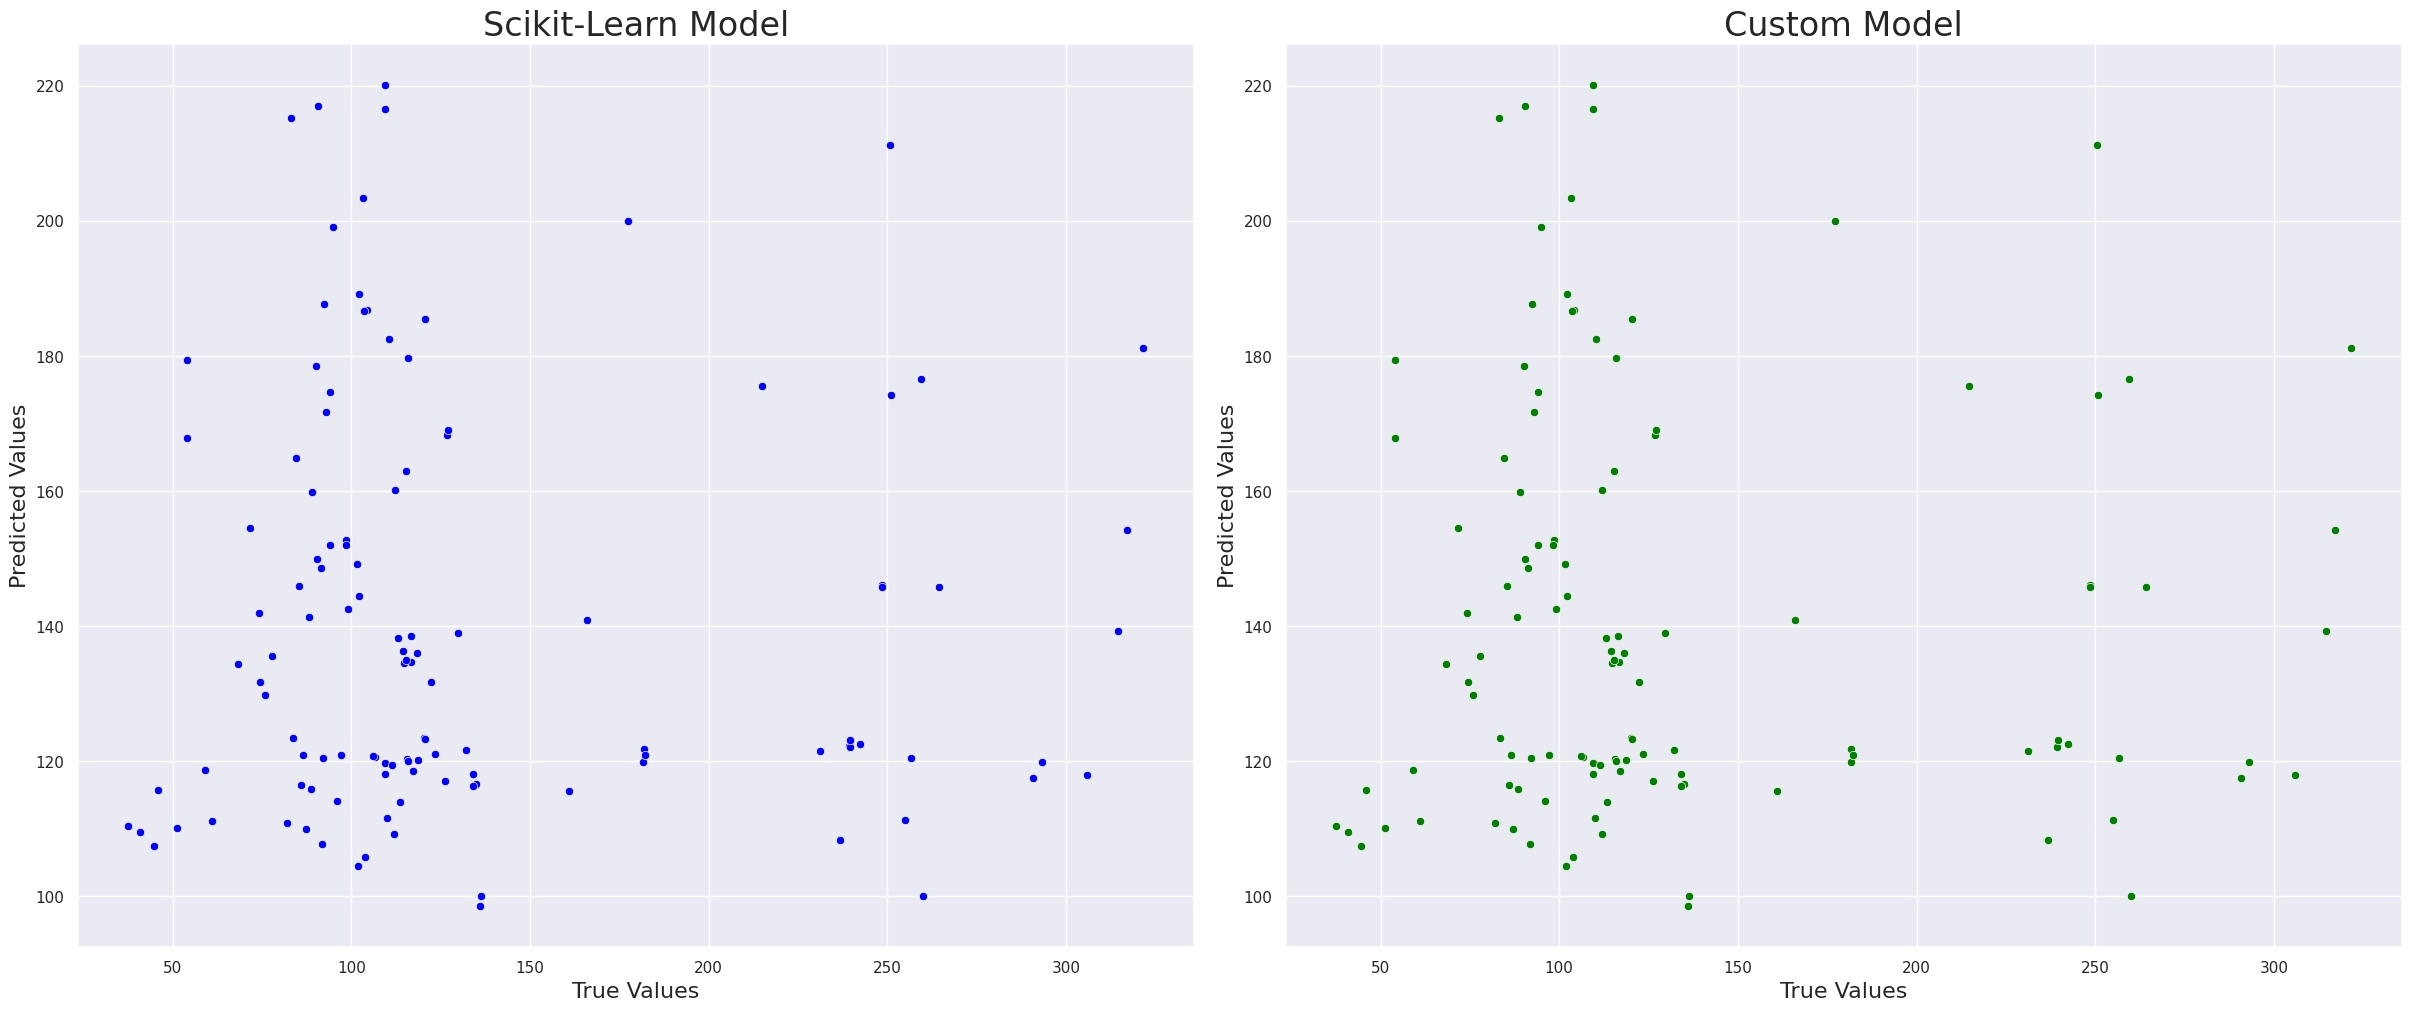

In [22]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 10), dpi=100, constrained_layout = True)
# axs = axs.flatten()
# i=0
sns.scatterplot(
    x=y_test,
    y=sk_yhat_ols,
    ax=ax1,
    color="Blue"
)

ax1.set_title(f"Scikit-Learn Model", fontsize=24)
ax1.set_xlabel("True Values", fontsize=16)
ax1.set_ylabel("Predicted Values", fontsize=16)

sns.scatterplot(
    x=y_test,
    y=custom_yhat_ols,
    ax=ax2,
    color="Green"
)

ax2.set_title(f"Custom Model", fontsize=24)
ax2.set_xlabel("True Values", fontsize=16)
ax2.set_ylabel("Predicted Values", fontsize=16)

fig = fig


### Cross-Validation Comparison

In [23]:
from sklearn.base import clone

In [24]:
a = [1,2,3, 4, 5,6]


In [25]:
def split_train_test_folds(folds, i):
    folds = folds.copy()
    fold_i = folds.pop(i)
    return folds, fold_i

In [26]:
def custom_cross_validate(clf, X, y, k):
    
    # Copy X into an np.array
    if type(X) in [pd.Series, pd.DataFrame]:
        X = X.copy().values
    
    # Copy y into an np.array
    if type(y) in [pd.Series, pd.DataFrame]:
        y = y.copy().values

    # Get the length of the dataset
    n = len(X)
    # Get the number of instances of the folds
    part_size = n // k

    # Splits the data in K folds and if n % k != 0, it adds the remainder in the final fold
    folds_X = [X[(i*part_size):(i*part_size+part_size)] if i < (k-1) else X[(i*part_size):] for i in range(k)]
    folds_y = [y[(i*part_size):(i*part_size+part_size)] if i < (k-1) else y[(i*part_size):] for i in range(k)]

    models = []
    rmse = []
    r2 = []
    
    for i in range(k):
        # Gets the train-validate folds
        X_train_fold, X_validation = split_train_test_folds(folds_X, i)
        y_train_fold, y_validation = split_train_test_folds(folds_y, i)

        # Concatenate the folds to get an np.array
        X_train = np.vstack(X_train_fold)
        y_train = np.hstack(y_train_fold)

        # This ensure that every time a model is trained, it's new and conntains the same parameters
        model = clone(clf)

        model.fit(X_train, y_train)
        y_hat = model.predict(X_validation)

        models.append(model)
        rmse.append(root_mean_squared_error(y_validation, y_hat))
        r2.append(r2_score(y_validation, y_hat))

    best_model_index = np.argmin(rmse)
    metrics = {"RMSE": rmse, "R2": r2}
    # Returns the best model and the metrics of each fold
    return models[best_model_index], metrics


In [27]:
n_splits=5

In [28]:
lm = LinearRegression()
model, metrics = custom_cross_validate(lm, X_train, y_train, k=n_splits)
metrics

{'RMSE': [58.287968774486814,
  105.91854852063888,
  51.08698737587064,
  56.73261125469128,
  53.65612069834221],
 'R2': [0.20765980896994685,
  -0.18616048373973793,
  -0.7606347207015016,
  -0.017222546058093036,
  -0.9522872366229211]}

In [29]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [30]:
cv = KFold(n_splits=n_splits)
scores = cross_val_score(lm, X_train, y_train, cv=cv, scoring="neg_root_mean_squared_error")
[-score for score in scores]

[58.37668287551295,
 104.8662636512108,
 48.89125202482109,
 56.060311407483894,
 55.03210897524929]

## 2. Penalised Linear Regression Models

One big difference between Lasso and Ridge Regression is that Lasso due to it's constraint $\left| \beta_j \right|$ the solutions are nonlinear in the $y_i$, and there is no closed form expression. The  Lasso algorithm is a quadratic programming problem, so we can use some famous optimizations algorithms such as Gradient Descent and Coordinate Descent. For this reeason we decided to use Ridge Regression in our study. Although we offer one implementation of the Lasso Regression in the notebook `Lasso.ipynb` using the Coordinate Descent Method. 

### Explaining the Algorithm

Ridge Regression shrinks the regression coefficients by imposing a penalty on their size. The ridge coefficients minimize a penalized residual sum of squares, given by the following equation:

$$ \hat{\beta}^{lasso} = \argmin_{\beta} \left\{ \frac{1}{2} \sum_{i=1}^{N} \left( y_i - \beta_0 - \sum_{j=1}^{p} x_{ij} \beta_j \right)^2 + \lambda \sum_{j=1}^{p} \beta_j^2 \right\} $$

It can also be wrote in the matrix form:

$$ RSS(\lambda) = (\bold{y} - \bold{X} \beta)^T (\bold{y} - \bold{X}  \beta) + \lambda \beta^T \beta$$

Denote by $\bold{X}$ the $N \times p $ (not $p + 1$) matrix with each row an input vector, and similarly let $\bold{y}$ be the N-vector of outputs in the training set. In this case we **DO NOT WANT TO REGULARIZE THE INTERCEPT**, so usually we do not add one extra column with ones. Penalization of the intercept would make the procedure depend on the origin chosen for $\bold{y}$; that is, adding a constant $c$ to each of the targets $y_i$ would not simply result in a shift of the predictions by the same amount $c$. To find a solution to this problem, one can *center* the inputs around the column mean and update its values to $x_{ij} = x_{ij} - \overline{x}_j$ and the outputs to $y_{i} = y_{i} - \overline{y}$. This way the intercept $\beta_0$ is equal to $\overline{y} = \sum_{i=1}^{N} y_i$


One way to minimize this function is by setting it's derivative in respect to $\beta$ to zero.

<!-- $$ \frac{\partial RSS}{\partial\beta}  = -2\bold{X}^T (\bold{y} - \bold{X}  \beta)$$
$$ \bold{X}^T (\bold{y} - \bold{X}  \beta) = 0 $$ -->

$$ \hat{\beta} =  (\bold{X}^T \bold{X} + \lambda \bold{I})^{-1} \bold{X}^T \bold{y}$$

Other solution for the case that there is an intercept can be found [here](https://stats.stackexchange.com/questions/602412/what-would-be-the-solution-of-ridge-regression-if-there-is-an-intercept). In this case one should include a column of 1s plus any "features" or "independent variables to $\bold{X}$ and consider the following
$$\gamma = \begin{bmatrix}
\beta_0 \\
\beta 
\end{bmatrix}$$

$$\hat{\gamma} =  (\bold{X}^T \bold{X} + \lambda \bold{A})^{-1} \bold{X}^T \bold{y}$$

$$\bold{A} = \begin{bmatrix}
0 & 0 \\
0 & \bold{I} 
\end{bmatrix}$$

### Choosing the best value for $\lambda$

Since our Dataset isn't very big and our search space for $\lambda$ is small, we used the class [`GridSearchCV`](https://scikit-learn.org/1.5/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV) that applies a Exhaustive search over specified parameter values for an estimator.

In [31]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

In [32]:
ridge = Ridge()
cv = KFold(n_splits=n_splits)

In [33]:
parameters = {'alpha':[0.5, 0.2, 0.1, 0.05, 0.02, 0.01, 0.005, 0.002, 0.001, 0.0001]}
ridge_cv = GridSearchCV(ridge, parameters, cv=cv, scoring="neg_root_mean_squared_error")
ridge_cv.fit(X_train, y_train)

best_params_ridge = ridge_cv.best_params_
best_params_ridge

{'alpha': 0.5}

In [34]:
alpha_ridge = best_params_ridge["alpha"]

### Model Implementation Comparison 

In [35]:
##### Implementation of Ridge Regression from scrach

class RidgeRegressor(BaseEstimator, RegressorMixin):
    def __init__(self, alpha=0.5, scale=False):
        self.alpha = alpha
        self.scale = scale

    def fit(self, X, y):
        
        if type(X) in [pd.Series, pd.DataFrame]:
            X = X.copy().values
        
        if type(y) in [pd.Series, pd.DataFrame]:
            y = y.copy().values

        if self.scale == True:
            X_scaled = X - np.mean(X, axis=0)
        else:
            X_scaled = X.copy()
        
        self.X = np.hstack((np.ones([X.shape[0],1], X.dtype), X))
        self.y = y
        self.N, self.p = X.shape

        A = np.identity(self.p+1)
        
        # This "Turns off" the regularization for for beta_0
        A[0, 0] = 0
        
        self.weights = np.linalg.pinv(self.X.T @ self.X + self.alpha*A) @ self.X.T @ self.y
        
        return self

    def predict(self, X):

        if type(X) in [pd.Series, pd.DataFrame]:
            X = X.copy().values
            
        _X = np.hstack((np.ones([X.shape[0],1], X.dtype), X))
        return _X @ self.weights
    
    def get_variance(self):
        y_hat = self.predict(self.X)
        return 1/(self.N - self.p - 1) * np.sum((y_hat - self.y)**2)
    
    def get_params_covariance(self) -> np.ndarray:
        """The variance–covariance matrix of the least squares parameter estimates

        Returns:
            np.ndarray: The variance–covariance matrix
        """
        return np.linalg.pinv(self.X.T @ self.X) * self.get_variance()

In [36]:
rmse_ridge = []
r2_ridge = []

In [37]:
sk_ridge = Ridge(alpha=alpha_ridge)
sk_ridge.fit(X_train, y_train)

sk_yhat_ridge = sk_ridge.predict(X_test)
rmse_ridge.append(root_mean_squared_error(y_test, sk_yhat_ridge))
r2_ridge.append(r2_score(y_test, sk_yhat_ridge))

In [38]:
print("Coefficients: ", sk_ridge.coef_)
print("Intercept: ", sk_ridge.intercept_)

Coefficients:  [  7.24209522 -23.3828791    7.89489764   2.86864875  -4.18714264
  -4.2974365    3.95613638  -0.36105845  -0.78688355   0.78688355]
Intercept:  128.5841758317462


In [39]:
custom_ridge = RidgeRegressor(alpha=alpha_ridge)
custom_ridge.fit(X_train, y_train)

custom_yhat_ridge = custom_ridge.predict(X_test)
rmse_ridge.append(root_mean_squared_error(y_test, custom_yhat_ridge))
r2_ridge.append(r2_score(y_test, custom_yhat_ridge))

In [40]:
print("Coefficients: ", custom_ridge.weights[1:])
print("Intercept: ", custom_ridge.weights[0])

Coefficients:  [  7.24209522 -23.3828791    7.89489764   2.86864875  -4.18714264
  -4.2974365    3.95613638  -0.36105845  -0.78688355   0.78688355]
Intercept:  128.5841758317385


In [41]:
ridge_results = pd.DataFrame([rmse_ridge, r2_ridge], columns=["Skearn Ridge", "Custom Ridge"], index=["RMSE", "R2"]).T
ridge_results

,RMSE,R2
Skearn Ridge,75.579467,-0.22074
Custom Ridge,75.579467,-0.22074


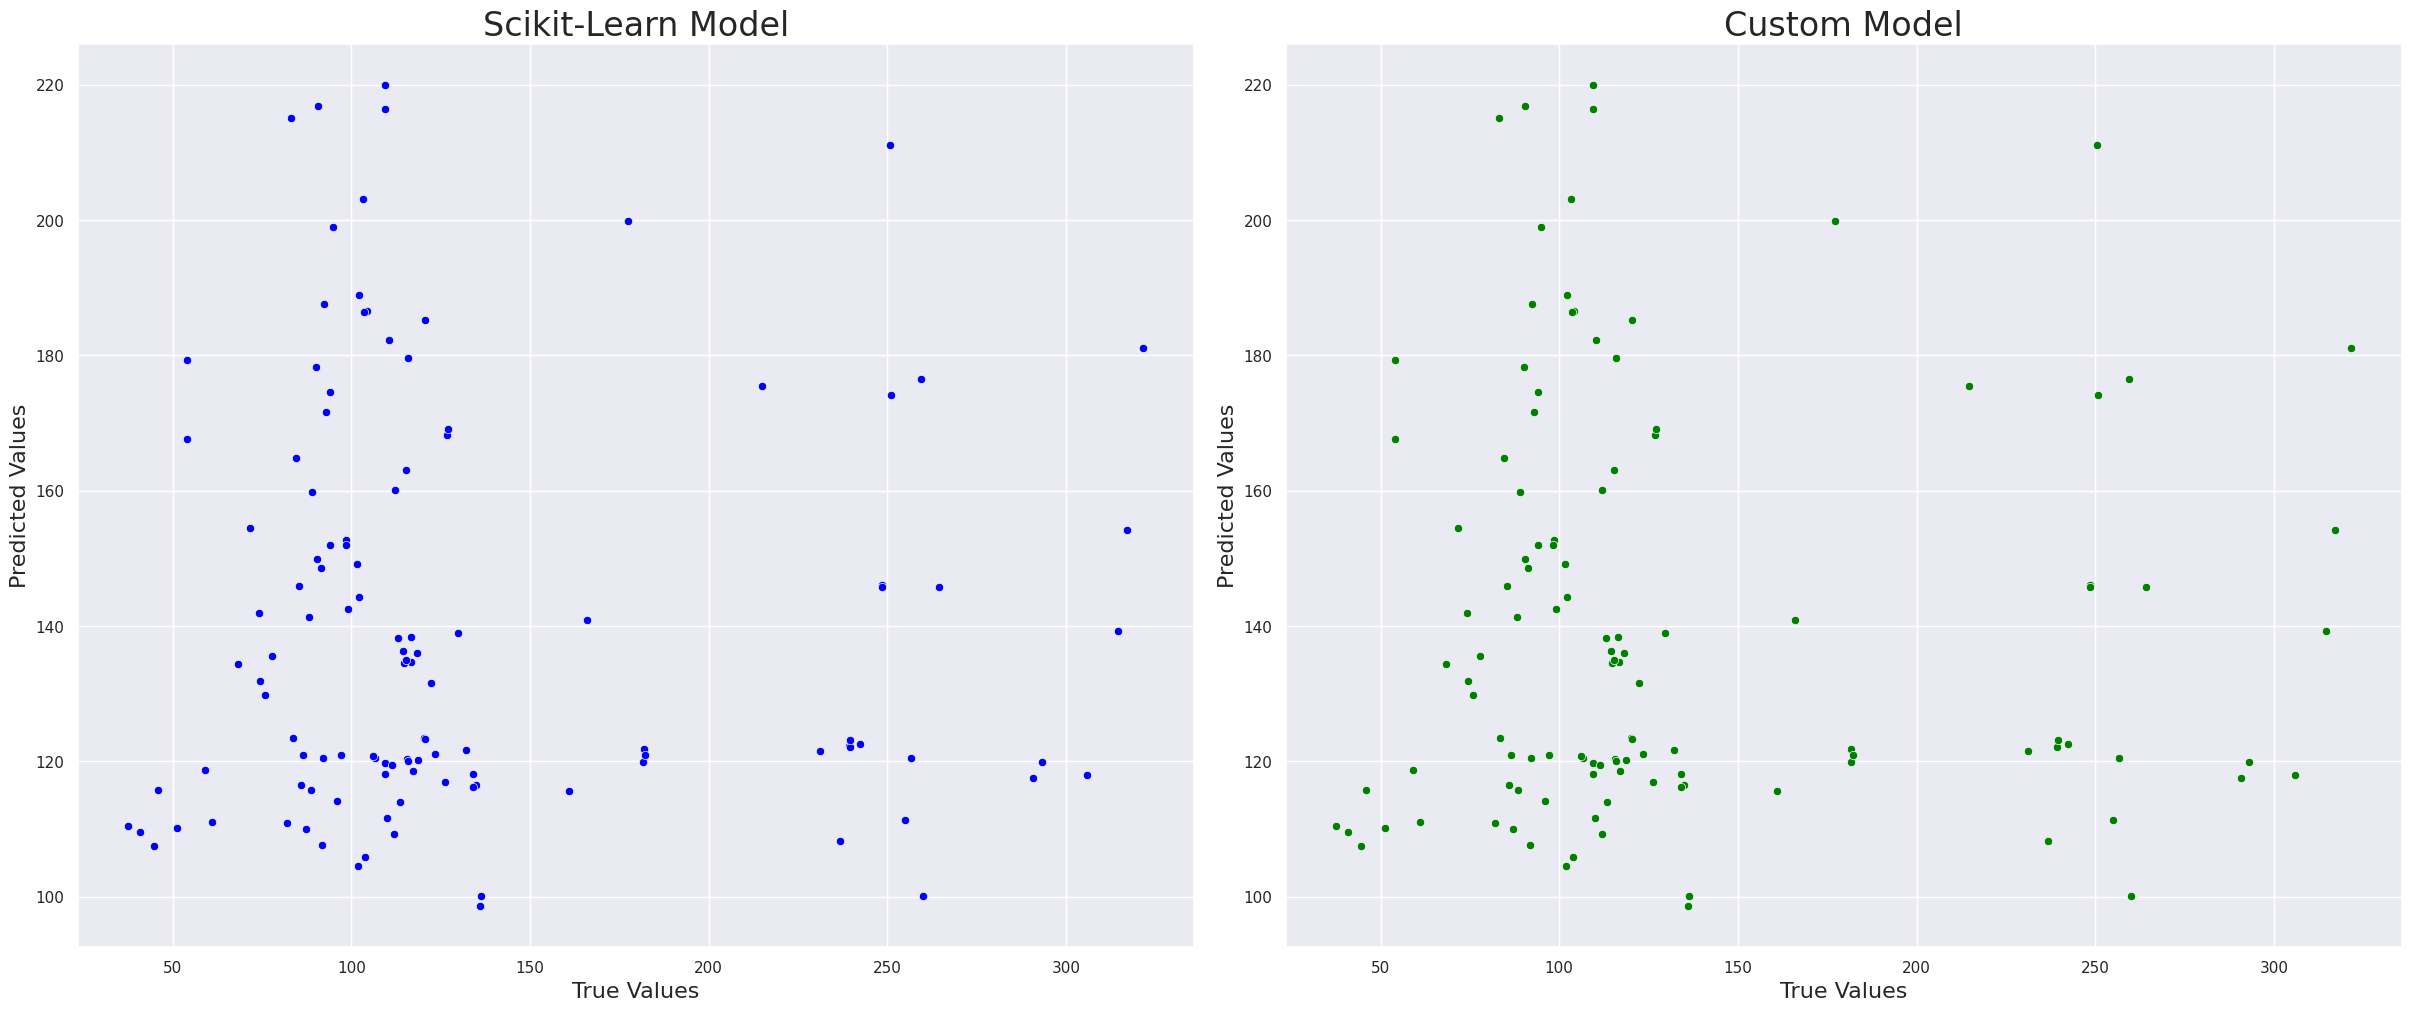

In [42]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 10), dpi=100, constrained_layout = True)
# axs = axs.flatten()
# i=0
sns.scatterplot(
    x=y_test,
    y=sk_yhat_ridge,
    ax=ax1,
    color="Blue"
)

ax1.set_title(f"Scikit-Learn Model", fontsize=24)
ax1.set_xlabel("True Values", fontsize=16)
ax1.set_ylabel("Predicted Values", fontsize=16)

sns.scatterplot(
    x=y_test,
    y=custom_yhat_ridge,
    ax=ax2,
    color="Green"
)

ax2.set_title(f"Custom Model", fontsize=24)
ax2.set_xlabel("True Values", fontsize=16)
ax2.set_ylabel("Predicted Values", fontsize=16)

fig = fig


## 3. Methods using Derived Input Directions

One big difference between Partial Least Squares (PLS) and PCA is that PLS not only returns the direction of the largest variance among the feature vector $\bold{X}$, it also finds the direction of the largest covariance in $\bold{X}$ and the output space $\bold{Y}$. For this reason, we used PLS in our analysis.

In [43]:
from sklearn.cross_decomposition import PLSRegression

In [44]:
n_features = X_train.shape[1]

In [45]:
pls = PLSRegression()

In [46]:
parameters = {'n_components':[i for i in range(1, n_features+1)]}
cv = KFold(n_splits=n_splits)
pls_cv = GridSearchCV(pls, parameters, cv=cv, scoring="neg_root_mean_squared_error")
pls_cv.fit(X_train, y_train)

best_params_pls = pls_cv.best_params_
best_params_pls

{'n_components': 1}

In [47]:
n_components = best_params_pls["n_components"]

In [48]:
pls_model = PLSRegression(n_components=n_components)
pls_model.fit(X_train, y_train)

PLSRegression(n_components=1)

In [49]:
rmse_pls = []
r2_pls = []

In [50]:
yhat_pls = pls_model.predict(X_test)
rmse_pls.append(root_mean_squared_error(y_test, yhat_pls))
r2_pls.append(r2_score(y_test, yhat_pls))

In [51]:
pls_results = pd.DataFrame([rmse_pls, r2_pls], columns=["PLS"], index=["RMSE", "R2"]).T
pls_results

,RMSE,R2
PLS,70.588214,-0.064829


Text(0, 0.5, 'Predicted Values')

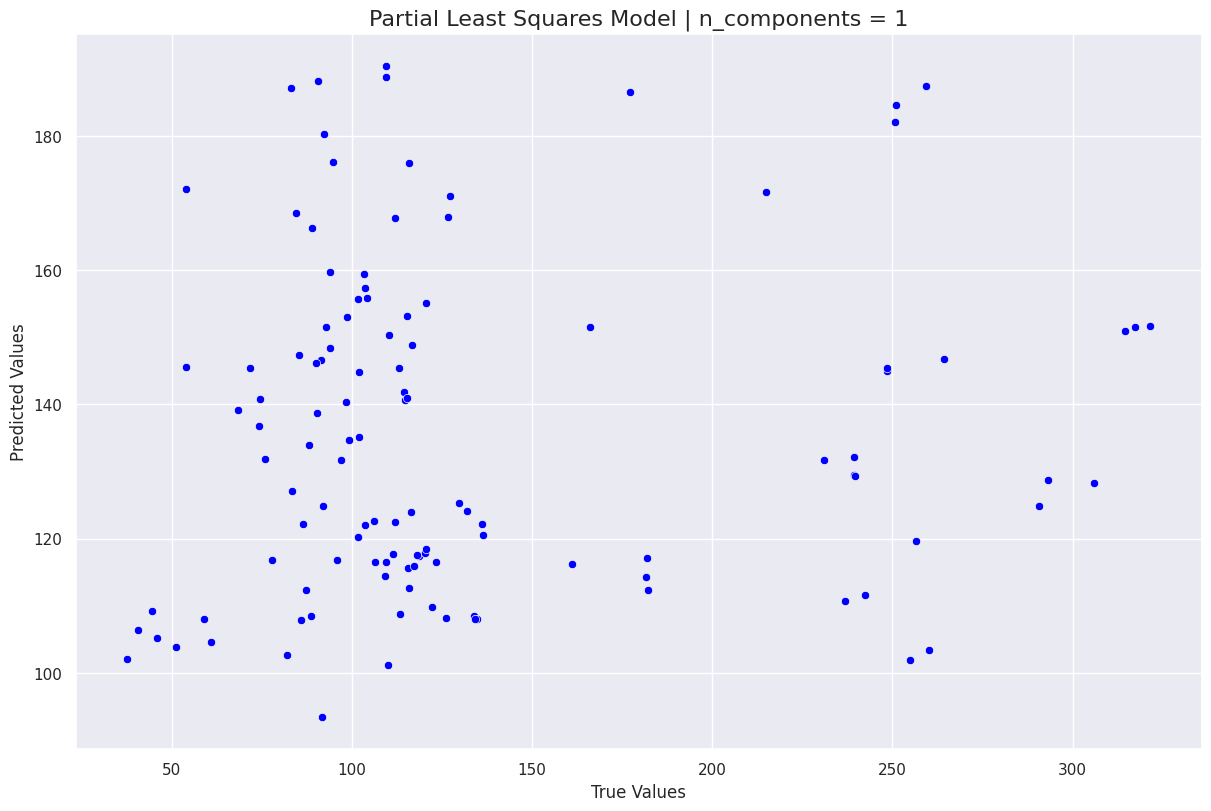

In [52]:
fig, ax = plt.subplots(1, 1, figsize=(12, 8), dpi=100, constrained_layout = True)
# axs = axs.flatten()
# i=0
sns.scatterplot(
    x=y_test,
    y=yhat_pls,
    ax=ax,
    color="Blue"
)

ax.set_title(f"Partial Least Squares Model | n_components = {n_components}", fontsize=16)
ax.set_xlabel("True Values", fontsize=12)
ax.set_ylabel("Predicted Values", fontsize=12)

## 4. Neural Network Model for Regression

### 4.1 Using Scikit-Learn

#### 4.1.1 Finding the Network Parameters

Considering that now we have a larger model and a more complex set of hyperparameters, we are using [`RandomizedSearchCV`]()

In [53]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import RandomizedSearchCV

In [54]:
nn = MLPRegressor()
cv = KFold(n_splits=n_splits)


In [55]:
parameters = {
    'learning_rate_init':[0.1, 0.05, 0.01, 0.005, 0.001, 0.0001],
    'hidden_layer_sizes': [(10, ), (20, ), (10, 10, ), (20, 20, )],
    'random_state': [42],
    'activation': ['relu'], 
    'solver': ['adam'], 
    'alpha': [0.0001], 
    'batch_size': [32],
    }
nn_cv = RandomizedSearchCV(nn, parameters, cv=cv, scoring="neg_root_mean_squared_error")
nn_cv.fit(X_train, y_train)

best_params_nn = nn_cv.best_params_
best_params_nn

/home/francisconog/anaconda3/envs/ML/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/francisconog/anaconda3/envs/ML/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/francisconog/anaconda3/envs/ML/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/francisconog/anaconda3/envs/ML/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged ye

{'solver': 'adam',
 'random_state': 42,
 'learning_rate_init': 0.005,
 'hidden_layer_sizes': (10,),
 'batch_size': 32,
 'alpha': 0.0001,
 'activation': 'relu'}

#### 4.1.2 Training the Model with best parameters

In [56]:
# nn_model = MLPRegressor(hidden_layer_sizes=(20, 20, ), 
#                          activation='relu', 
#                          solver='adam', 
#                          alpha=0.0001, 
#                          batch_size=32)

nn_model = MLPRegressor(**best_params_nn)
nn_model.fit(X_train, y_train)

/home/francisconog/anaconda3/envs/ML/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor(batch_size=32, hidden_layer_sizes=(10,), learning_rate_init=0.005,
             random_state=42)

In [57]:
rmse_nn = []
r2_nn = []

In [58]:

yhat_nn = nn_model.predict(X_test)
rmse_nn.append(root_mean_squared_error(y_test, yhat_nn))
r2_nn.append(r2_score(y_test, yhat_nn))

In [59]:

sknn_results = pd.DataFrame([rmse_nn, r2_nn], columns=["Sklearn Neural Net"], index=["RMSE", "R2"]).T
sknn_results

,RMSE,R2
Sklearn Neural Net,77.885132,-0.296357


Text(0, 0.5, 'Predicted Values')

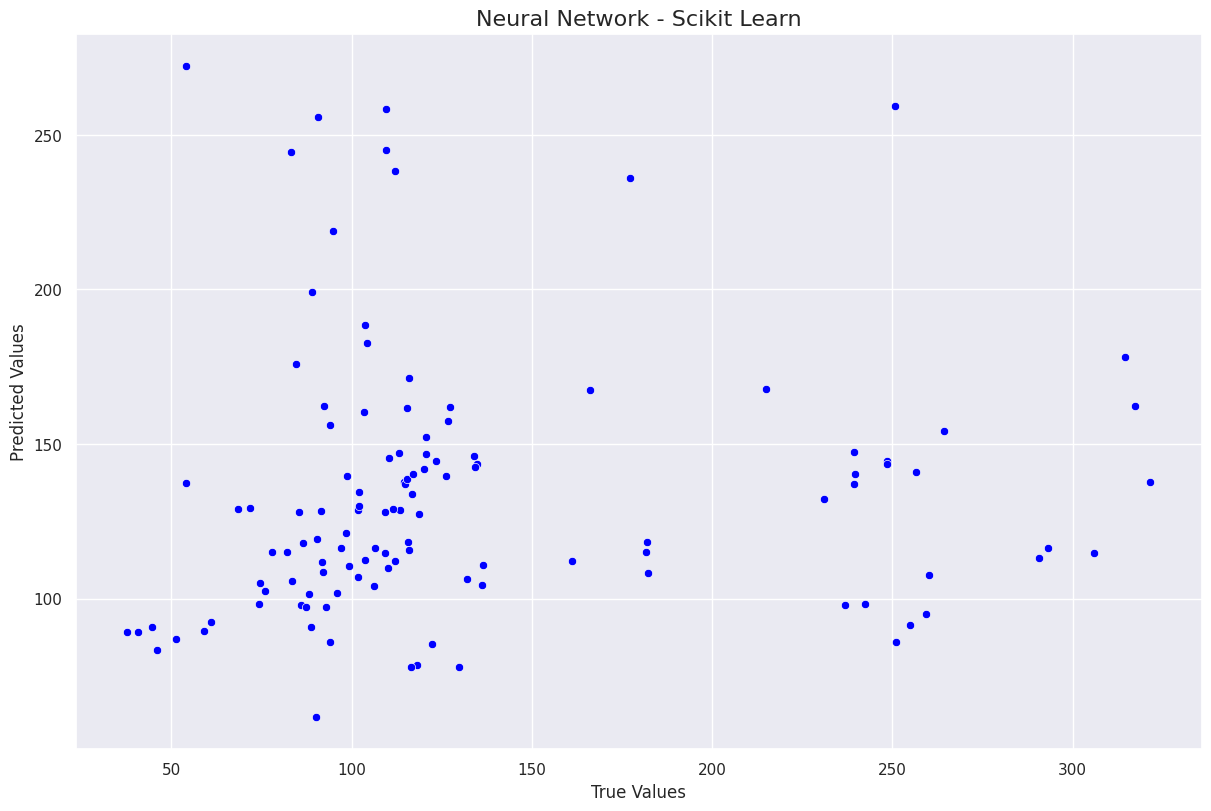

In [60]:

fig, ax = plt.subplots(1, 1, figsize=(12, 8), dpi=100, constrained_layout = True)
# axs = axs.flatten()
# i=0
sns.scatterplot(
    x=y_test,
    y=yhat_nn,
    ax=ax,
    color="Blue"
)

ax.set_title(f"Neural Network - Scikit Learn", fontsize=16)
ax.set_xlabel("True Values", fontsize=12)
ax.set_ylabel("Predicted Values", fontsize=12)

### 4.2 Using PyTorch

In [61]:
import torch
import torch.nn as nn
from torch.optim import Adam
from torch.utils.data import TensorDataset, DataLoader

In [62]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
torch.cuda.is_available()

True

In [63]:
lr = best_params_nn['learning_rate_init']
batch_size=best_params_nn['batch_size']

In [64]:
layers = [
    nn.Linear(n_features, 20),  # Input
    # nn.ReLU(),  # Activation for input
    # nn.Linear(20, 20),  # Hidden
    nn.ReLU(),  # Activation for hidden
    nn.Linear(20, 1)  # Output
]
layers

[Linear(in_features=10, out_features=20, bias=True),
 ReLU(),
 Linear(in_features=20, out_features=1, bias=True)]

In [65]:
model = nn.Sequential(*layers)
model.to(device)
model

Sequential(
  (0): Linear(in_features=10, out_features=20, bias=True)
  (1): ReLU()
  (2): Linear(in_features=20, out_features=1, bias=True)
)

In [66]:
# Showing that the model are running on the GPU
next(model.parameters()).device

device(type='cuda', index=0)

In [67]:
# Compiling Model
model = torch.compile(model)

# Loss Function
loss_function = nn.MSELoss()

# Choosing the optimizer
optimizer = Adam(model.parameters(), lr=lr)

In [68]:
# Spliting the training data into Train-Validation
_X_train, X_valid, _y_train, y_valid = train_test_split(
    X_train.values, y_train.values, test_size=0.1, random_state=42)


In [69]:
# Training set
# X_train_tensor = torch.tensor(_X_train.values, dtype=torch.double).to(device)
# y_train_tensor = torch.tensor(_y_train.values[:, np.newaxis]).to(device)

# Validation set
# X_valid_tensor = torch.tensor(X_valid.values).to(device)
# y_valid_tensor = torch.tensor(y_valid.values[:, np.newaxis]).to(device)

# Test set
X_test_tensor = torch.tensor(X_test.values).to(device)
y_test_tensor = torch.tensor(y_test.values[:, np.newaxis]).to(device)

In [70]:
def numpy_to_torch_dataset(X, y, batch_size, device='cpu'):
    """
    Converts a 2-D numpy array and a 1-D numpy array into a Torch TensorDataset with DataLoader.

    Parameters:
        X (np.ndarray): 2-D numpy array of inputs.
        y (np.ndarray): 1-D numpy array of outputs.
        batch_size (int): Batch size for the DataLoader.

    Returns:
        DataLoader: Torch DataLoader for the dataset.
    """
    X_tensor = torch.tensor(X, dtype=torch.float32).to(device)
    y_tensor = torch.tensor(y[:, np.newaxis], dtype=torch.float32).to(device)
    dataset = TensorDataset(X_tensor, y_tensor)
    dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)
    return dataloader

In [71]:
train_loader = numpy_to_torch_dataset(_X_train, _y_train, batch_size, device)
valid_loader = numpy_to_torch_dataset(X_valid, y_valid, batch_size, device)

#### Training Model

In [72]:
def rmse_loss(predictions, targets):
    """
    Computes the Root Mean Squared Error (RMSE) loss for a batch.

    Parameters:
        predictions (torch.Tensor): Predicted values.
        targets (torch.Tensor): Actual values.

    Returns:
        torch.Tensor: RMSE loss for the batch.
    """
    mse_loss = torch.mean((predictions - targets) ** 2)
    rmse = torch.sqrt(mse_loss)
    return rmse

In [73]:
def train(train_loader, train_loss, train_rmse):
    loss = 0
    rmse = 0

    model.train()
    for X, y in train_loader:
        output = model(X)  # Updated
        optimizer.zero_grad()
        batch_loss = loss_function(output, y)
        batch_loss.backward()
        optimizer.step()

        loss += batch_loss.item()
        rmse += rmse_loss(output, y)
    train_loss.append(loss)
    train_rmse.append(rmse)
    print('Train - Loss: {:.4f} RMSE: {:.4f}'.format(loss, rmse))

In [74]:
def validate(valid_loader, valid_loss, valid_rmse):
    loss = 0
    rmse = 0

    model.eval()
    with torch.no_grad():
        for X, y in valid_loader:
            output = model(X)

            loss += loss_function(output, y).item()
            rmse += rmse_loss(output, y)
    valid_loss.append(loss)
    valid_rmse.append(rmse)
    print('Valid - Loss: {:.4f} rmse: {:.4f}'.format(loss, rmse))

In [75]:
epochs = 100
epochs_list = []
train_loss = []
train_rmse = []
valid_loss = []
valid_rmse = []

for epoch in range(epochs):
    print('Epoch: {}'.format(epoch))
    train(train_loader, train_loss, train_rmse)
    validate(valid_loader, valid_loss, valid_rmse)
    epochs_list.append(epoch)

Epoch: 0


/home/francisconog/anaconda3/envs/ML/lib/python3.10/site-packages/torch/_inductor/compile_fx.py:90: UserWarning: TensorFloat32 tensor cores for float32 matrix multiplication available but not enabled. Consider setting `torch.set_float32_matmul_precision('high')` for better performance.
  warnings.warn(


Train - Loss: 196560.5186 RMSE: 1318.2935
Valid - Loss: 17325.6250 rmse: 131.6268
Epoch: 1
Train - Loss: 190640.1387 RMSE: 1306.6329
Valid - Loss: 17204.0137 rmse: 131.1641
Epoch: 2
Train - Loss: 187563.1973 RMSE: 1286.6707
Valid - Loss: 17050.4492 rmse: 130.5774
Epoch: 3
Train - Loss: 193894.4648 RMSE: 1304.6339
Valid - Loss: 16842.1660 rmse: 129.7774
Epoch: 4
Train - Loss: 187816.7832 RMSE: 1281.6882
Valid - Loss: 16572.0840 rmse: 128.7326
Epoch: 5
Train - Loss: 180949.7422 RMSE: 1269.6802
Valid - Loss: 16214.8965 rmse: 127.3377
Epoch: 6
Train - Loss: 178742.7734 RMSE: 1263.9839
Valid - Loss: 15782.3994 rmse: 125.6280
Epoch: 7
Train - Loss: 173849.6631 RMSE: 1240.6857
Valid - Loss: 15265.6504 rmse: 123.5542
Epoch: 8
Train - Loss: 172733.5312 RMSE: 1235.7067
Valid - Loss: 14683.5801 rmse: 121.1758
Epoch: 9
Train - Loss: 160782.0674 RMSE: 1190.2695
Valid - Loss: 14024.0098 rmse: 118.4230
Epoch: 10
Train - Loss: 158909.8818 RMSE: 1186.6671
Valid - Loss: 13320.2578 rmse: 115.4134
Epoch: 

In [76]:
train_rmse = [float(x) for x in train_rmse]
valid_rmse = [float(x) for x in valid_rmse]

train_loss = [float(x) for x in train_loss]
valid_loss = [float(x) for x in valid_loss]

Text(0.5, 0, 'Epochs')

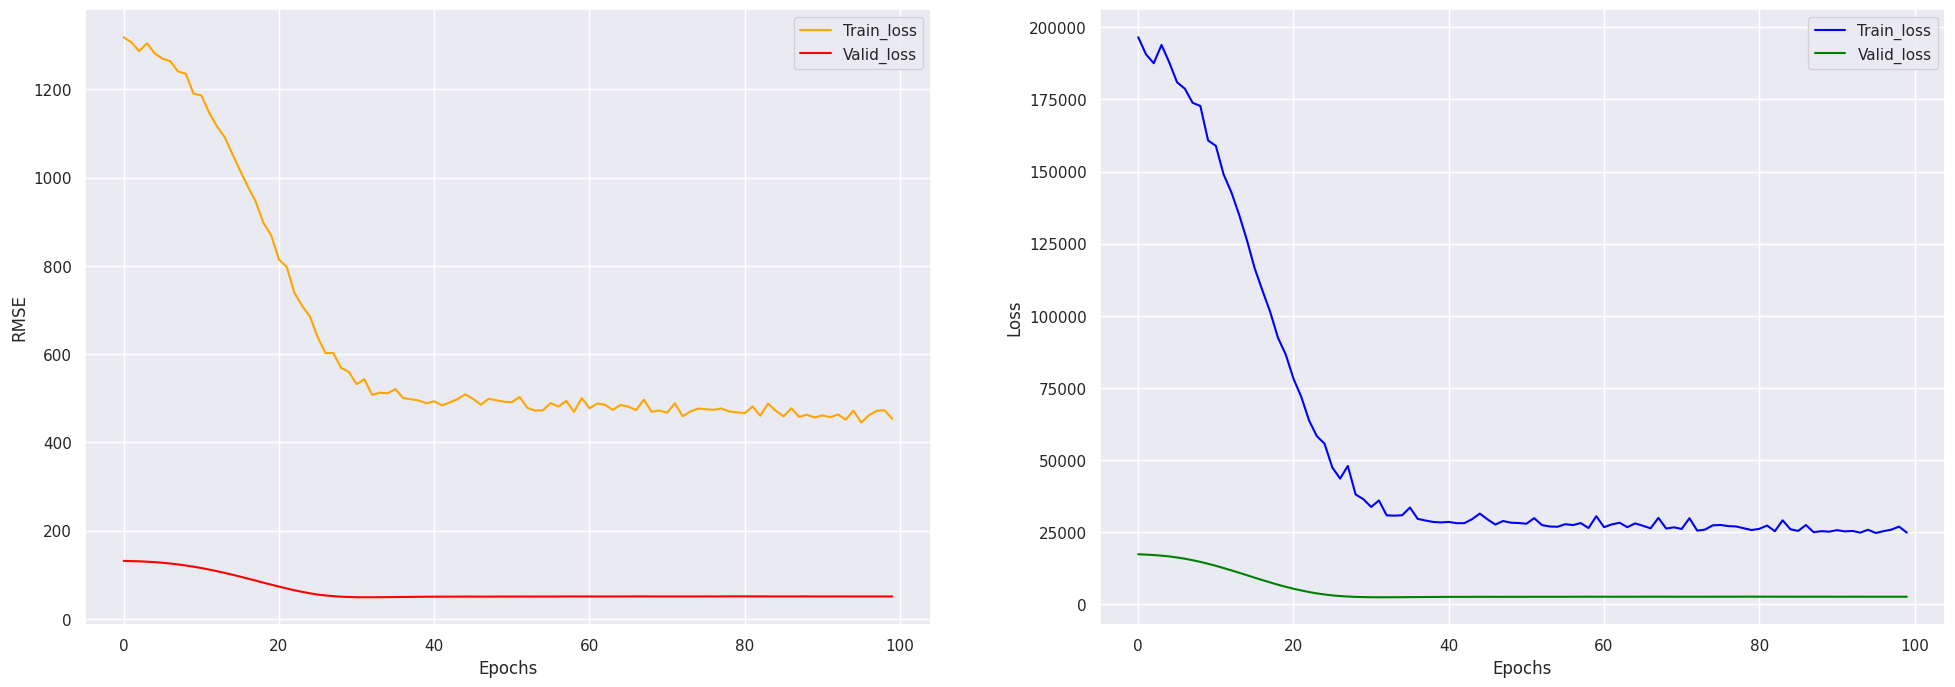

In [77]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 8))

sns.lineplot(x=epochs_list, y=train_rmse, label="Train_loss", color="orange", ax=ax1)
sns.lineplot(x=epochs_list, y=valid_rmse, label="Valid_loss", color="red", ax=ax1)
ax1.set_ylabel('RMSE')
ax1.set_xlabel('Epochs')

sns.lineplot(x=epochs_list, y=train_loss, label="Train_loss", color="blue", ax=ax2)
sns.lineplot(x=epochs_list, y=valid_loss, label="Valid_loss", color="green", ax=ax2)
ax2.set_ylabel('Loss')
ax2.set_xlabel('Epochs')


In [78]:
rmse_torch = []
r2_torch = []

In [79]:

yhat_torch = model(X_test_tensor)
y_hat_np = yhat_torch.cpu().detach().numpy().squeeze()


In [80]:
rmse_torch.append(root_mean_squared_error(y_test, y_hat_np))
r2_torch.append(r2_score(y_test, y_hat_np))


In [81]:

torch_results = pd.DataFrame([rmse_torch, r2_torch], columns=["Pytorch Neural Net"], index=["RMSE", "R2"]).T
torch_results

,RMSE,R2
Pytorch Neural Net,76.761968,-0.259238


Text(0, 0.5, 'Predicted Values')

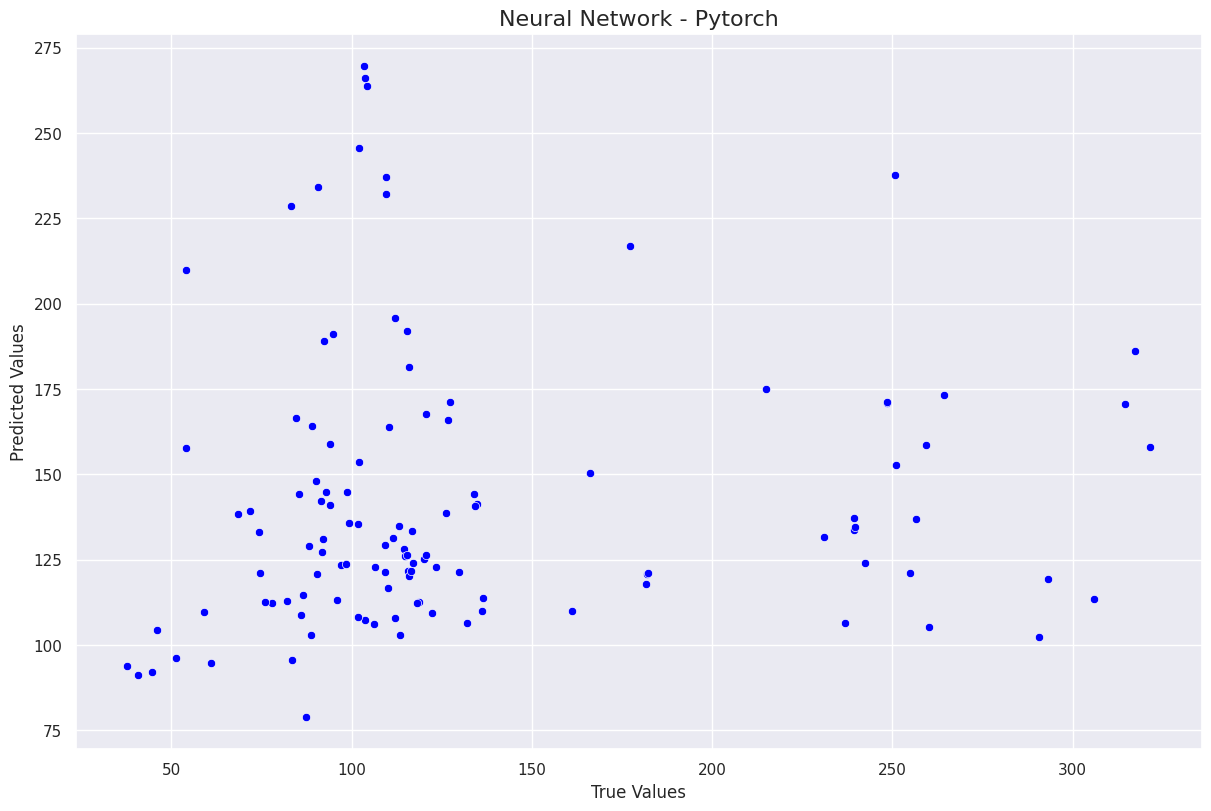

In [82]:
pd.DataFrame([rmse_torch, r2_torch], columns=["PLS"], index=["RMSE", "R2"]).T
fig, ax = plt.subplots(1, 1, figsize=(12, 8), dpi=100, constrained_layout = True)
# axs = axs.flatten()
# i=0
sns.scatterplot(
    x=y_test,
    y=y_hat_np,
    ax=ax,
    color="Blue"
)

ax.set_title(f"Neural Network - Pytorch", fontsize=16)
ax.set_xlabel("True Values", fontsize=12)
ax.set_ylabel("Predicted Values", fontsize=12)

In [83]:
# Results Summary
summary = pd.concat([ols_results, ridge_results, pls_results, sknn_results, torch_results])
summary

,RMSE,R2
Sklearn OLS,75.615915,-0.221918
Custom OLS,75.615915,-0.221918
Skearn Ridge,75.579467,-0.220740
Custom Ridge,75.579467,-0.220740
PLS,70.588214,-0.064829
Sklearn Neural Net,77.885132,-0.296357
Pytorch Neural Net,76.761968,-0.259238
